# TiNNy - Classification Demo

Welcome to the TiNNy classification demo! In this demonstration, we leverage the renowned MNIST dataset to classify images of handwritten digits ranging from 0 to 9. The MNIST dataset is a cornerstone in the field of machine learning for benchmarking algorithms in image recognition.

AstroDave, Will Cukierski. (2012). Digit Recognizer. Kaggle. https://kaggle.com/competitions/digit-recognizer

In [1]:
# Import modules

import tinny
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

/home/pablospilab/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Data loading and preparation

In [2]:
data_train = np.array(pd.read_csv('./data/classification/train.csv')).T
data_test = np.array(pd.read_csv('./data/classification/test.csv')).T

m, n = data_train.shape

X_train = data_train[1:n]
y_train = data_train[0]

X_train, X_test, y_train, y_test = train_test_split(X_train.T, y_train, train_size=35000, random_state=42)

X_train = X_train.T / 255.0
X_test = X_test.T / 255.0

## Creating a TiNNy Network

Building a TiNNy network involves defining its architecture by specifying the layers that make it up. Here’s how you can effortlessly construct your network:

1. Layer Specifications: Each layer within the network requires three key pieces of information:
    - The number of inputs it will receive.
    - The number of neurons (or units) it contains.
    - The activation function to apply to its outputs.

2. Layer Types: Our network can incorporate both Dense layers and an Output layer. For this demonstration:
    - Dense Layers: We will utilize the ReLU (Rectified Linear Unit) activation function, configuring these layers with 20 neurons each.
    - Output Layer: Given the multi-class classification nature of our problem, the softmax activation function is employed to handle the output layer effectively.

3. Network Configuration: To finalize the TiNNy network setup, we specify:
    - The type of problem we are addressing (either regression or classification).
    - The loss function to optimize during training.
    - The layers that constitute the network architecture.

In [3]:
l1 = tinny.DenseLayer(784, 20, "ReLU")
l2 = tinny.DenseLayer(20, 20, "ReLU")
l3 = tinny.OutputLayer(20, 10, "softmax")
nn = tinny.TiNNyNetwork(problem_type="classification", loss_function="crossentropy", layers=[l1, l2, l3])

### Visualizing the TiNNy Network

To visualize the architecture of our TiNNy network, employ the `render()` method. This functionality provides a graphical representation of the network's structure, showcasing the configured layers.

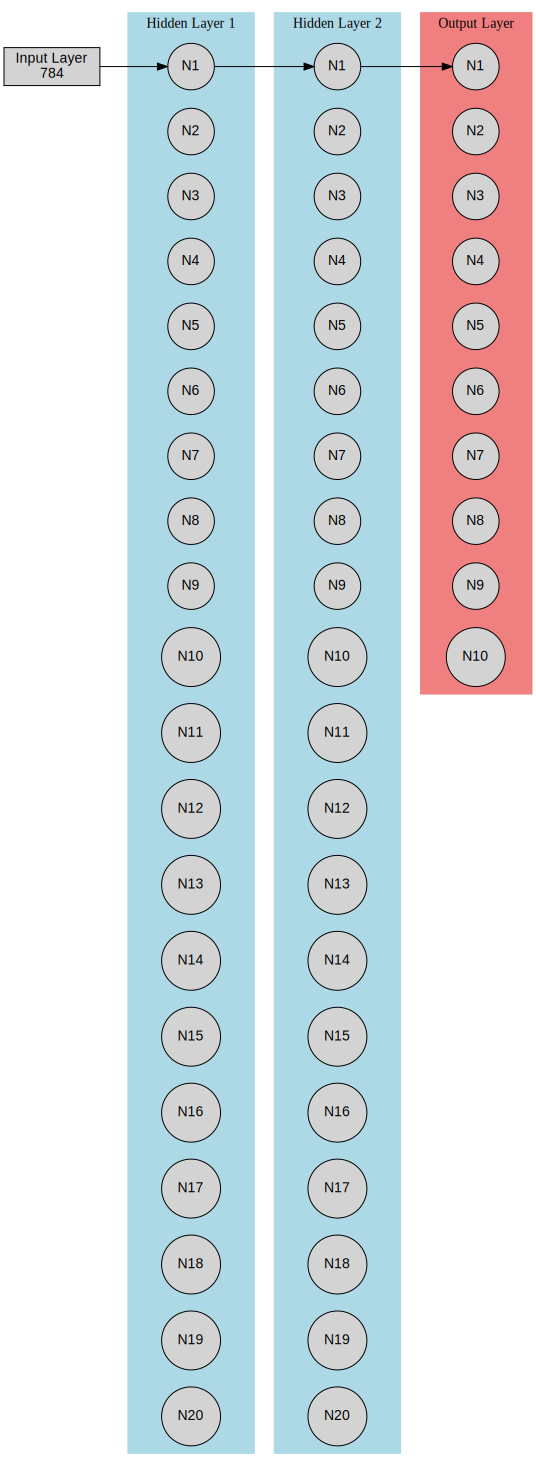

In [4]:
nn.render()

## Training and Testing Our Network

Training our neural network involves specifying the number of epochs (iterations) and setting the learning rate, which are crucial parameters that influence the model's convergence and performance. 

Upon testing our neural network, visualizing the performance becomes essential. One effective method is plotting the confusion matrix. This visualization aids in understanding the model's accuracy across different classes, where elements along the diagonal represent correctly classified instances. 


Iteration 0
Loss: -0.5464746803096069
Accuracy: 0.08468571428571428
Iteration 10
Loss: 5.564388157269121
Accuracy: 0.27231428571428573
Iteration 20
Loss: 5.126210346297479
Accuracy: 0.44114285714285717
Iteration 30
Loss: 3.9589057657852478
Accuracy: 0.5428
Iteration 40
Loss: 3.3667177039230793
Accuracy: 0.6118285714285714
Iteration 50
Loss: 7.280399261839007
Accuracy: 0.48605714285714285
Iteration 60
Loss: 2.9678300759433065
Accuracy: 0.6931428571428572
Iteration 70
Loss: 2.858444355130099
Accuracy: 0.6947142857142857
Iteration 80
Loss: 2.1519380146835765
Accuracy: 0.7238571428571429
Iteration 90
Loss: 2.0925217227746757
Accuracy: 0.7496857142857143
Iteration 100
Loss: 2.094843860590462
Accuracy: 0.7678285714285714
Iteration 110
Loss: 2.0735855476603215
Accuracy: 0.7797714285714286
Iteration 120
Loss: 2.0690479369647026
Accuracy: 0.7942571428571429
Iteration 130
Loss: 2.0446499900932547
Accuracy: 0.8036285714285715
Iteration 140
Loss: 2.0473653606643762
Accuracy: 0.8127714285714286
Ite

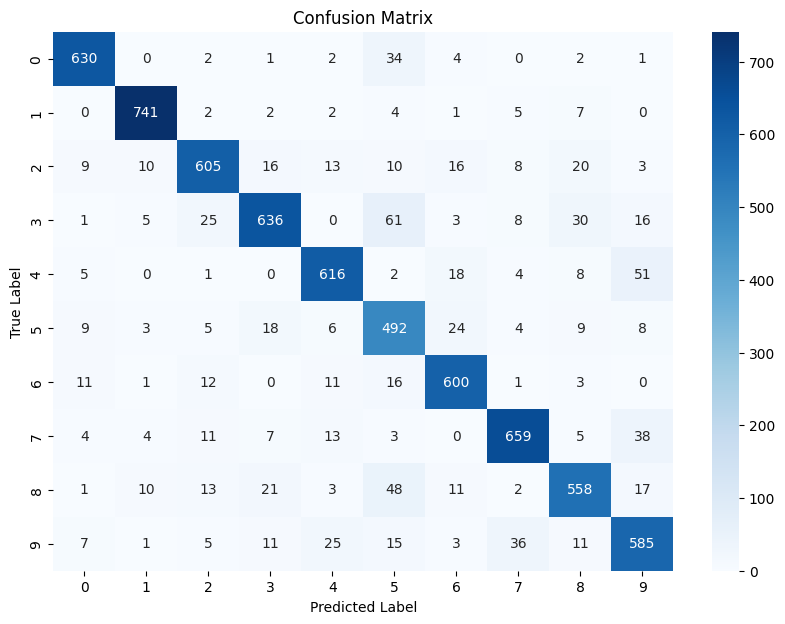

In [5]:
nn.train(X_train, y_train, iterations=300, learning_rate=0.005)
nn.test(X_test, y_test, plot=True)